# Machine Learning Engineer Nanodegree
## Project: Capstone Proposal and Capstone Project
## Definition

For the final project I havee decided to join to one of competitions on Kaggle.com. 
	
It was launched by [Home Credit Group](http://www.homecredit.net), an international consumer finance provider. 
It focuses on responsible lending primarily to people with little or no credit history. 
Many people struggle to get loans due to insufficient or non-existent credit histories. 
And, unfortunately, this population is often taken advantage of by untrustworthy lenders. 
Home Credit strives to broaden financial inclusion for the unbanked population by providing 
a positive and safe borrowing experience. In order to make sure this underserved population has a positive 
loan experience, Home Credit makes use of a variety of alternative data, including telco and transactional 
information to predict their clients' repayment abilities.

### Data Description

   There are the following files in a dataset
   
•  **application_{train|test}.csv**

       o This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
	
       o Static data for all applications. One row represents one loan in our data sample.
	
•  **bureau.csv**
	
       o All client's previous credits provided by other financial institutions that were reported to Credit Bureau 
	 (for clients who have a loan in our sample).
	 
       o For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau
     	before the application date.
	
•  **bureau_balance.csv**

       o Monthly balances of previous credits in Credit Bureau.
   
       o This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table              has (#loans in sample * # of relative previous credits * # of months where we have some history observable 
	     for the previous credits) rows.
	
•  **POS_CASH_balance.csv**

       o Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
	
       o This table has one row for each month of history of every previous credit in Home Credit 
       (consumer credit and cash loans) related to loans in our sample – i.e. the table has 
       (#loans in sample * # of relative previous credits * # of months in which we have some history observable 
       for the previous credits) rows.

•  **credit_card_balance.csv**

    o Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
	
    o This table has one row for each month of history of every previous credit in Home Credit 
      (consumer credit and cash loans) related to loans in our sample – i.e. the table has 
      (#loans in sample *# of relative previous credit cards *# of months where we have some history observable 
      for the previous credit card) rows.
    
•  **previous_application.csv**

    o All previous applications for Home Credit loans of clients who have loans in our sample.
   
    o There is one row for each previous application related to loans in our data sample.
   
•  **installments_payments.csv**

    o Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. 
   
    o There is a) one row for every payment that was made plus b) one row each for missed payment.
   
    o One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous 
	Home Credit credit related to loans in our sample.
	
•  **HomeCredit_columns_description.csv**

    o This file contains descriptions for the columns in the various data files.

All files can be downloaded from <https://www.kaggle.com/c/home-credit-default-risk/data>

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Credit Bank  dataset
ap_train=pd.read_csv("./data/application_train.csv")
ap_test=pd.read_csv("./data/application_test.csv")
 
# Success
print "Training dataset has {} data points with {} variables each.".format(*ap_train.shape)
print "Testing dataset has {} data points with {} variables each.".format(*ap_test.shape)

ap_train.head()

Training dataset has 307511 data points with 122 variables each.
Testing dataset has 48744 data points with 121 variables each.


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# columns gives column names of features
ap_train.columns

Index([u'SK_ID_CURR', u'TARGET', u'NAME_CONTRACT_TYPE', u'CODE_GENDER',
       u'FLAG_OWN_CAR', u'FLAG_OWN_REALTY', u'CNT_CHILDREN',
       u'AMT_INCOME_TOTAL', u'AMT_CREDIT', u'AMT_ANNUITY',
       ...
       u'FLAG_DOCUMENT_18', u'FLAG_DOCUMENT_19', u'FLAG_DOCUMENT_20',
       u'FLAG_DOCUMENT_21', u'AMT_REQ_CREDIT_BUREAU_HOUR',
       u'AMT_REQ_CREDIT_BUREAU_DAY', u'AMT_REQ_CREDIT_BUREAU_WEEK',
       u'AMT_REQ_CREDIT_BUREAU_MON', u'AMT_REQ_CREDIT_BUREAU_QRT',
       u'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
print(ap_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [7]:
print(ap_train.isnull().sum().max())


214865


In [8]:
ap_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

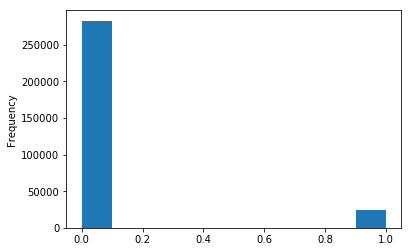

In [9]:
ap_train['TARGET'].astype(int).plot.hist()

## Examine Missing Values
Next we can look at the number and percentage of missing values in each column

In [10]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
# Missing values statistics
missing_values = missing_values_table(ap_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [16]:
# Number of each type of column
ap_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [17]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in ap_train:
    if ap_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(ap_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(ap_train[col])
            # Transform both training and testing data
            ap_train[col] = le.transform(ap_train[col])
            ap_test[col] = le.transform(ap_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [18]:
# one-hot encoding of categorical variables
ap_train = pd.get_dummies(ap_train)
ap_test = pd.get_dummies(ap_test)

print('Training Features shape: ', ap_train.shape)
print('Testing Features shape: ', ap_test.shape)

('Training Features shape: ', (307511, 243))
('Testing Features shape: ', (48744, 239))


In [19]:
train_labels = ap_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
ap_train, ap_test = ap_train.align(ap_test, join = 'inner', axis = 1)

# Add the target back in
ap_train['TARGET'] = train_labels

print('Training Features shape: ', ap_train.shape)
print('Testing Features shape: ', ap_test.shape)

('Training Features shape: ', (307511, 240))
('Testing Features shape: ', (48744, 239))
